# Seaborn

Seaborn es otra librería de visualización para python. Posee gráficos similares a matplotlib, pero a más alto nivel. Además, podemos integrar seaborn con matplotlib.

## Lección 1 - Gráficos relacionales 

El análisis estadístico es un proceso de comprensión de cómo las variables de un conjunto de datos se relacionan entre sí y cómo esas relaciones dependen de otras variables. La visualización puede ser un componente central de este proceso porque, cuando los datos se visualizan correctamente, el sistema visual humano puede ver tendencias y patrones que indican una relación.

En esta lección vamos a ver un gráfico principal el cual es el *relplot*. Este gráfico puede ser usado tanto como gráfico de líneas como gráfico de puntos


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
data = sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Relplot

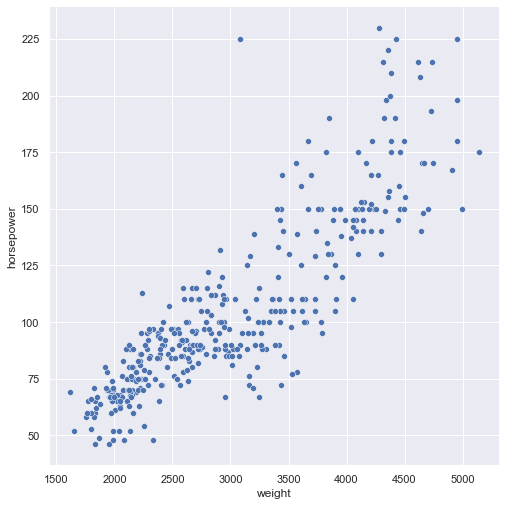

In [17]:
sns.set_theme(style="darkgrid")

sns.relplot(x = 'weight', y = 'horsepower', data = data, height=7)

Si bien los puntos se representan en dos dimensiones, se puede agregar otra dimensión al gráfico coloreando los puntos según una tercera variable. En seaborn, esto se implementa con el parámetro 'hue'.

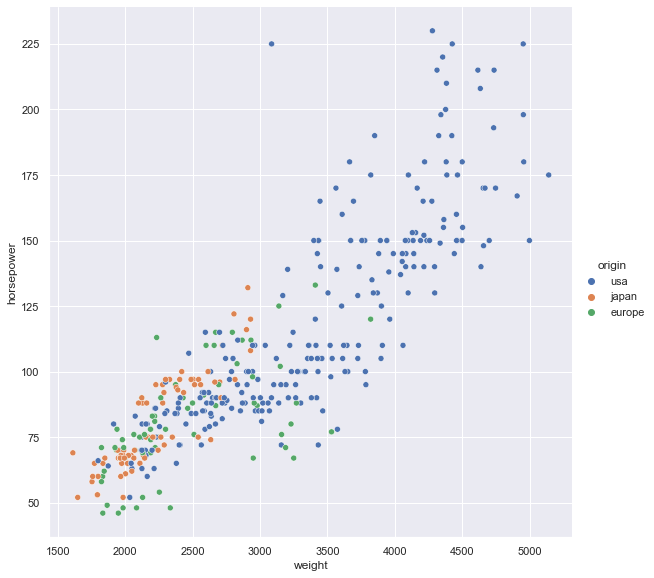

In [29]:
sns.relplot(x = 'weight', y = 'horsepower', data = data, height=8, hue = 'origin')

Aún podemos añadir una cuarta dimensión con el parámetro style

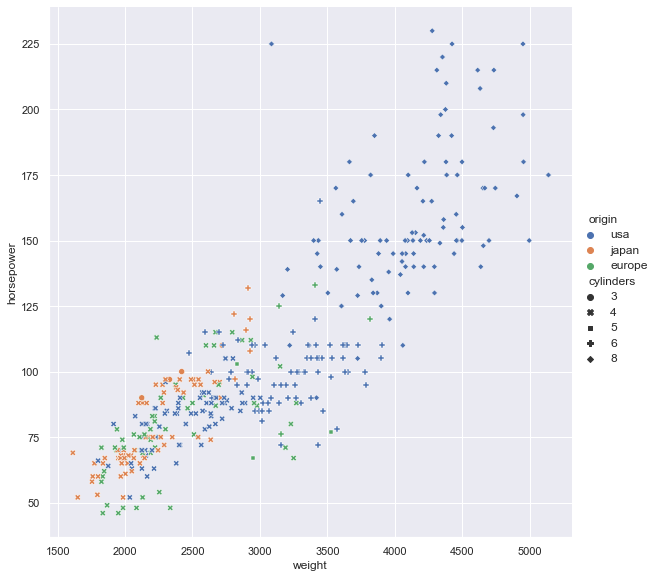

In [30]:
sns.relplot(x = 'weight', y = 'horsepower', data = data, height=8, hue = 'origin', style = 'cylinders')

Podemos aplicar la misma lógica, pero usando el tamaño del punto en lugar de la forma

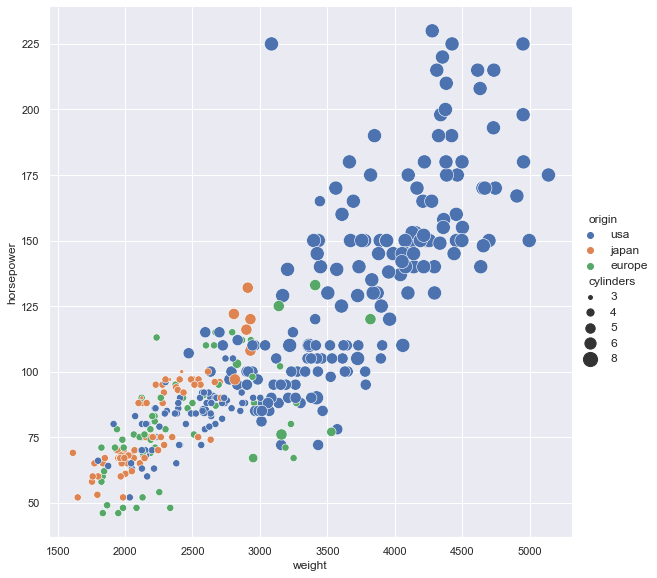

In [32]:
sns.relplot(x = 'weight', y = 'horsepower', data = data, height=8, hue = 'origin', size = 'cylinders', sizes = (15, 200))

También podemos usar el gráfico de lineas en lugar de puntos, bien sea para enfatizar una caída o porque nos guste más ese estilo.

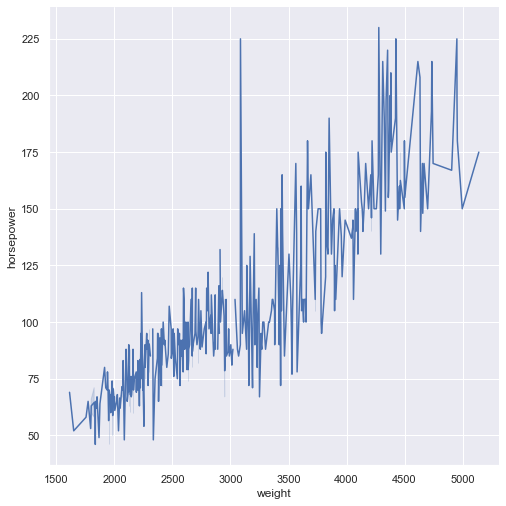

In [33]:
sns.relplot(x = 'weight', y = 'horsepower', data = data, height=7, kind = 'line')

Veamos algún gráfico de linea más complejo

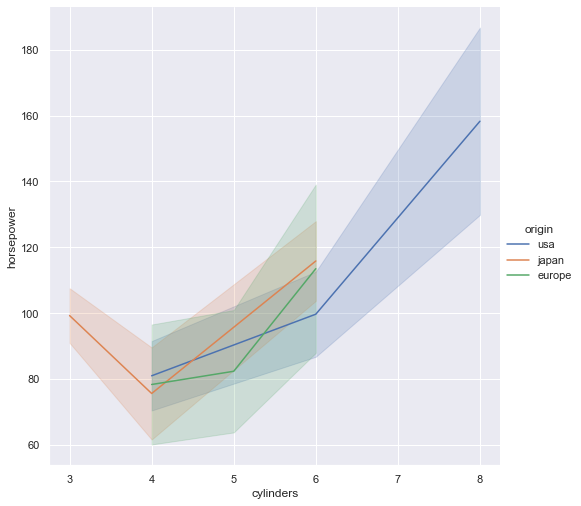

In [44]:
hp_mean = data.groupby('cylinders')['horsepower'].mean()
sns.relplot(x = 'cylinders', y = 'horsepower', data = data, height=7, kind = 'line', hue = 'origin', ci = 'sd')

También podemos trabajar con fechas de la misma forma que lo hemos hecho hasta ahora. Veamos un ejemplo

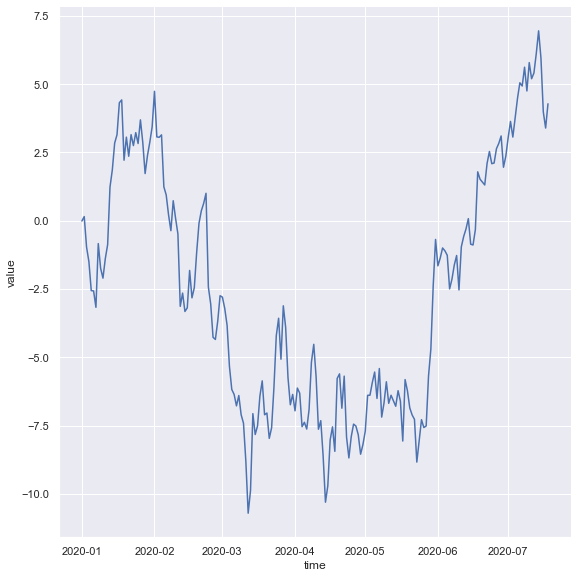

In [58]:
df = pd.DataFrame(dict(time=pd.date_range("2020-01-01", periods=200),
                       value=np.random.randn(200).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df, height = 8)
g

## Lección 2 - Gráficos categóricos

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [62]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Catplot

La representación predeterminada de los datos en seaborn es catplot(). Usa un diagrama de dispersión o puntos

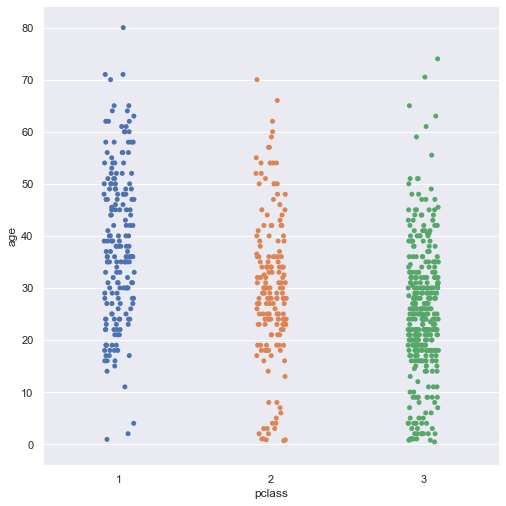

In [69]:
sns.catplot(x = 'pclass', y = 'age', data = data, height=7)

Si queremos evitar que los puntos se sobrepongan, usamos el kind = 'swarm'

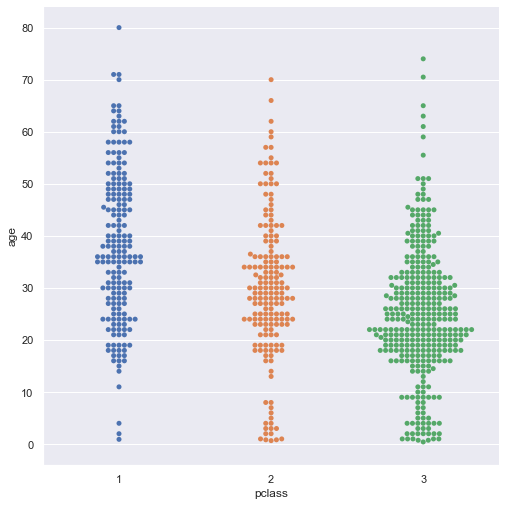

In [70]:
sns.catplot(x = 'pclass', y = 'age', data = data, height=7, kind = 'swarm', )

Al igual que ocurría con los gráficos relacionales, tenemos el parámetro hue

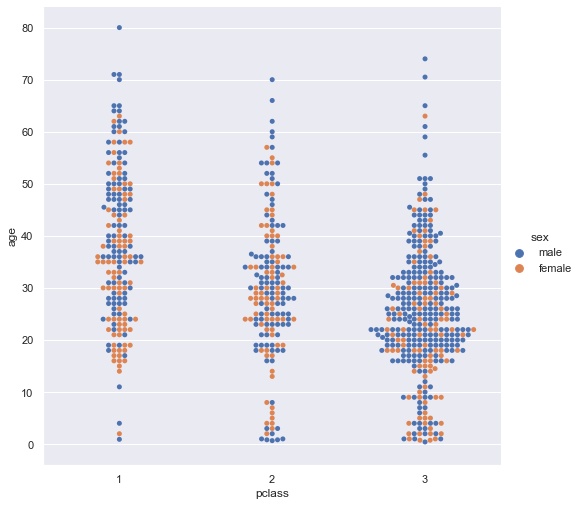

In [74]:
sns.catplot(x = 'pclass', y = 'age', data = data, height=7, kind = 'swarm', hue = 'sex')

### Boxplots

El boxplot es ell conocido diagrama de caja. Este tipo de gráfico muestra los valores de los tres cuartiles de la distribución junto con los valores extremos. Estos gráficos son muy usados para detectar valores anómalos u outliers

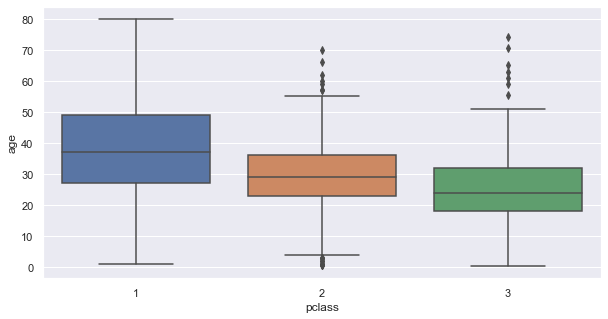

In [83]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = 'pclass', y = 'age', data = data, ax = ax)

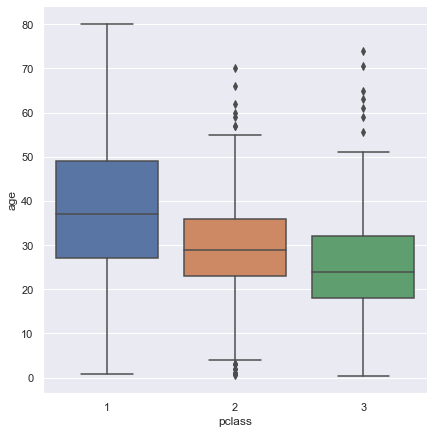

In [93]:
sns.catplot(x = 'pclass', y = 'age', data = data, kind = 'box', height = 6)

Cada parte de dichas gráficas están explicadas en la siguiente imagen:

![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

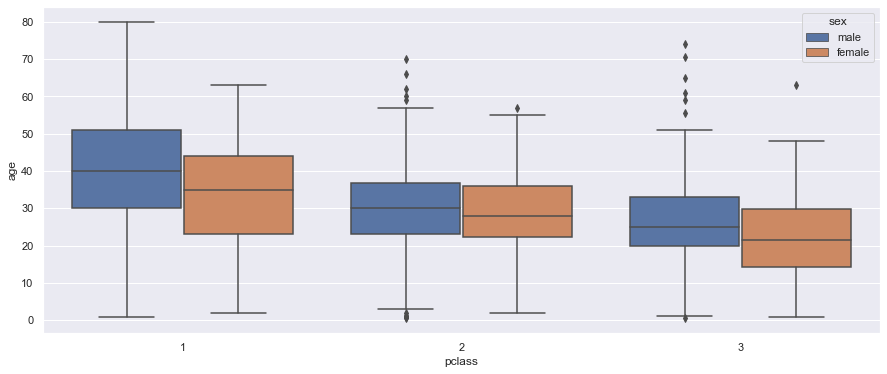

In [86]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.boxplot(x = 'pclass', y = 'age', data = data, hue = 'sex', ax = ax)

Si queremos el gráfico en horizontal, es importante cambiar los valores de x e y.

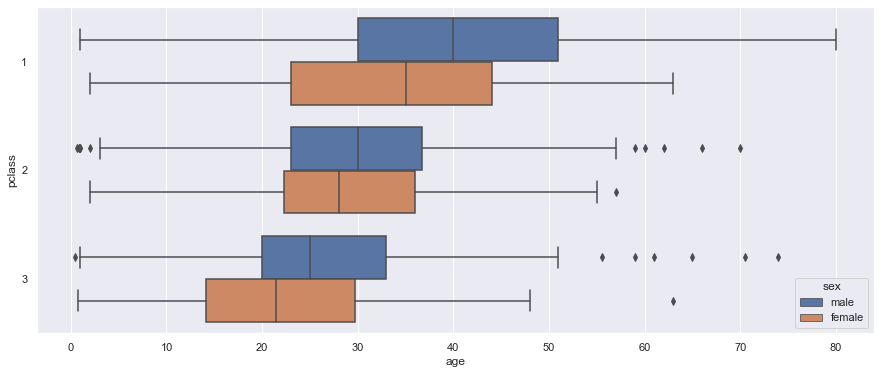

In [109]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.boxplot(x = 'age', y = 'pclass', data = data, hue = 'sex', ax = ax, orient='h')

Un gráfico similar es el *violin* plot. Representa datos similares al boxplot y se llama usando a *catplot*

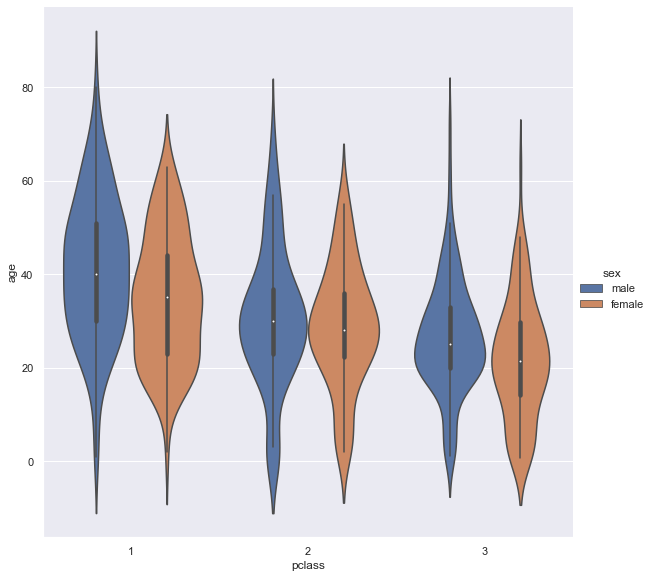

In [89]:
sns.catplot(x = 'pclass', y = 'age', data = data, hue = 'sex', kind = 'violin', height=8)

### Bar plots

Un gráfico muy tipico a la hora de representar variables categóricas es el *barplot*. También podemos llamarlo usando *catplot*

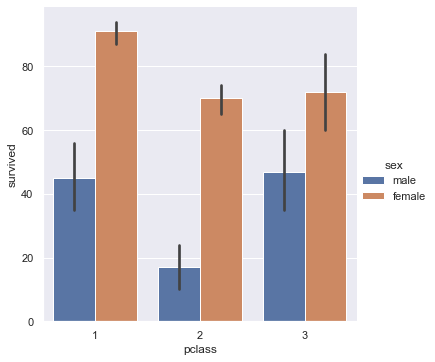

In [107]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = data, kind = 'bar', estimator=np.count_nonzero)

## Lección 3 - Gráficos para distribuciones

Un primer paso en cualquier esfuerzo por analizar o modelar datos debe ser comprender cómo se distribuyen las variables. Las técnicas para la visualización de la distribución pueden proporcionar respuestas rápidas a muchas preguntas importantes. ¿Qué rango cubren las observaciones? ¿Cuál es su tendencia? ¿Están muy sesgados en una dirección? ¿Hay valores atípicos significativos?

En esta lección vamos a centarnos en el gráfico *distplot*, el cual tiene distintas variantes como son *histplot(), kdeplot(), rugplot() o pairplot()*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Histplot

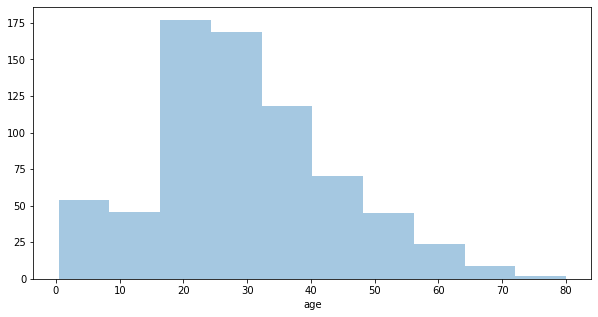

In [19]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.distplot(a = data['age'], bins = 10, hist = True, kde = False, ax = ax)

También podemos normalizar el histograma

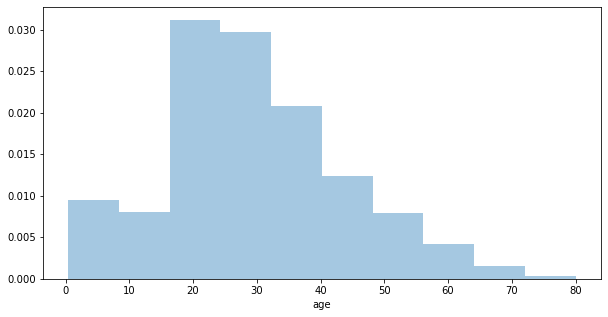

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.distplot(a = data['age'], bins = 10, hist = True, kde = False, norm_hist=True, ax = ax)

Si lo deseamos, podemos ser nosotros los que especifiquemos los bins a crear.

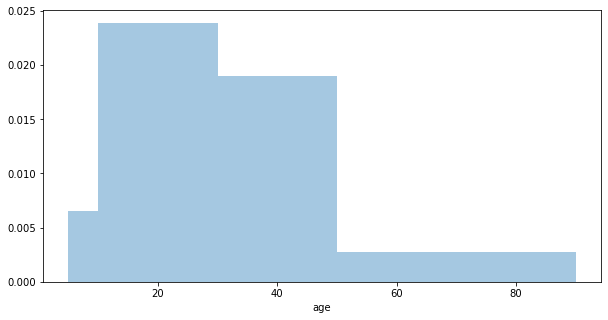

In [28]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.distplot(a = data['age'], bins = [5, 10, 30, 50, 90], hist = True, kde = False, norm_hist=True, ax = ax)

También podemos usar el distplot en variables categóricas

In [29]:
data['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

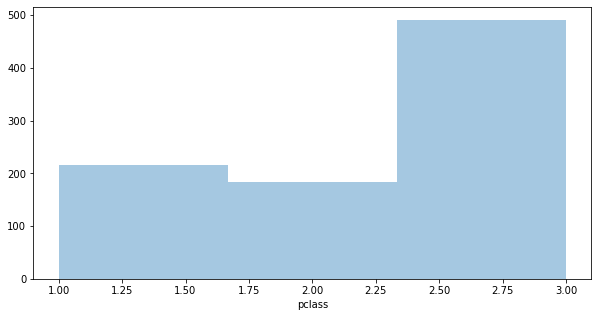

In [30]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.distplot(a = data['pclass'], bins = 3, hist = True, kde = False, norm_hist=False, ax = ax)

Ahora, vamos a ver como analizar varias variables en el mismo gráfico usando el histograma, pero llamandolo de una forma distinta

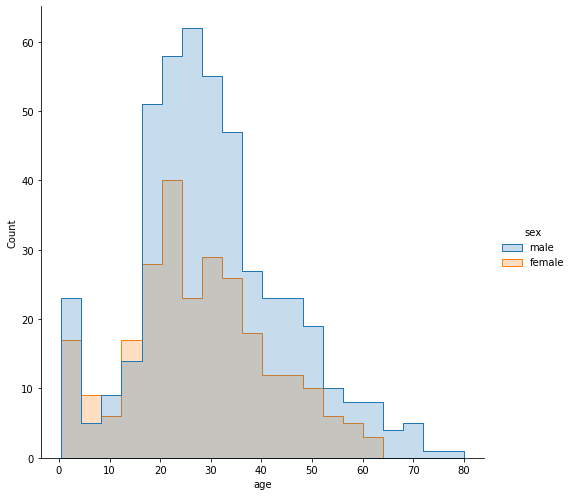

In [50]:
sns.displot(data, x="age", hue = 'sex', height=7, element = 'step')

También se pueden suporponer las barras

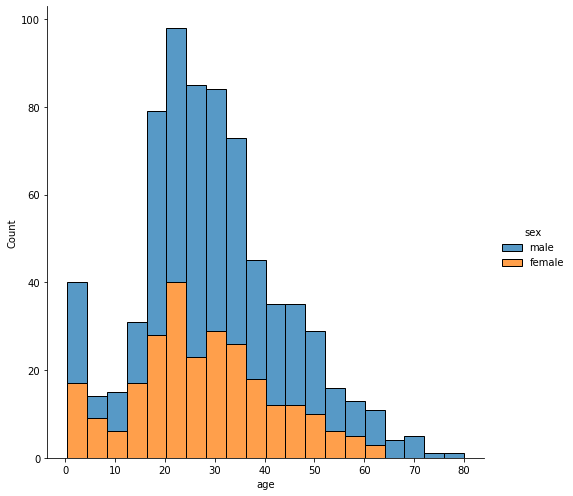

In [51]:
sns.displot(data, x="age", hue = 'sex', height=7, multiple = "stack")

O poner justo al lado...

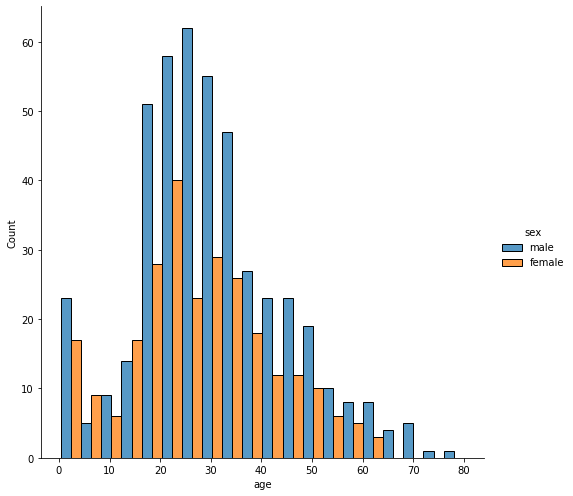

In [52]:
sns.displot(data, x="age", hue = 'sex', height=7, multiple = "dodge")

Si en lugar de tener la separación por sexo en el mismo gráfico lo ponemos en gráficos distintos, usaríamos el parámetro *col*

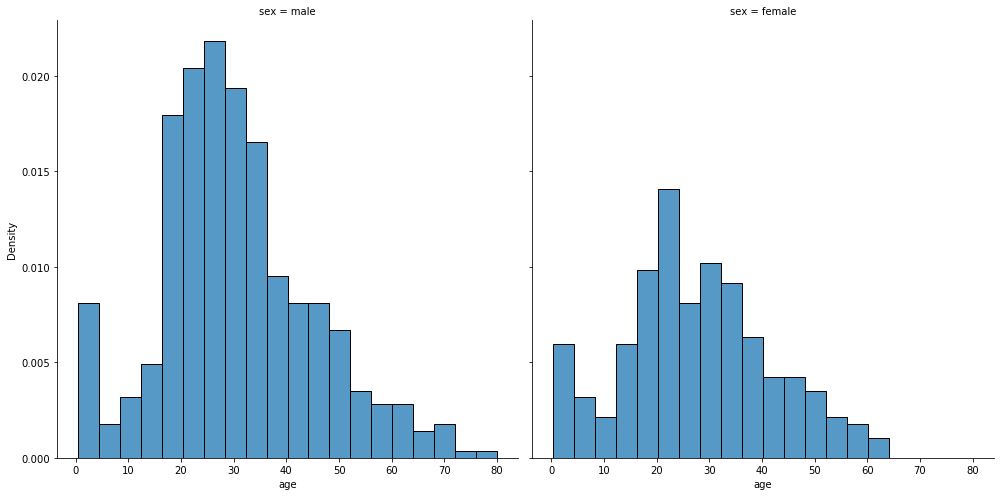

In [60]:
sns.displot(data, x="age", col = 'sex', height=7, stat = 'density')

Como podéis ver, además de separarlo hemos normalizado los valores. Estos valores normalizados 'density' son pocos interpretables. Si especificamos 'probability', la suma de las barras será 1.

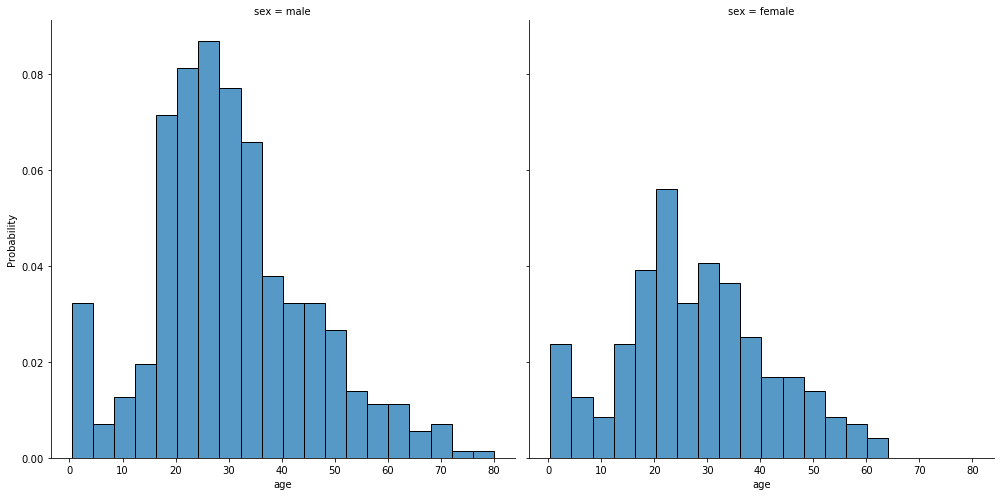

In [66]:
sns.displot(data, x="age", col = 'sex', height=7, stat = 'probability')

### KDE (kernel Density estimation)

Un histograma tiene como objetivo aproximar la función de densidad de probabilidad agrupando los datos y contando observaciones. La estimación de la densidad de kernel (KDE) presenta una solución diferente al mismo problema. En lugar de utilizar bins discretos, un gráfico de KDE suaviza las observaciones con un kernel gaussiano, lo que produce una estimación de densidad continua:

En el siguiente [enlace](https://mathisonian.github.io/kde/) se explica como se genera la KDE . Aquí, vamos a ver como se visualiza.

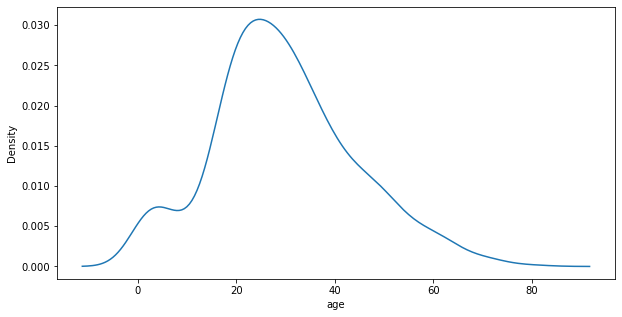

In [68]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.distplot(a = data['age'], bins = 10, hist = False, kde = True, ax = ax)

Podemos regular el tamaño de la banda, con el parámetro bw_adjust

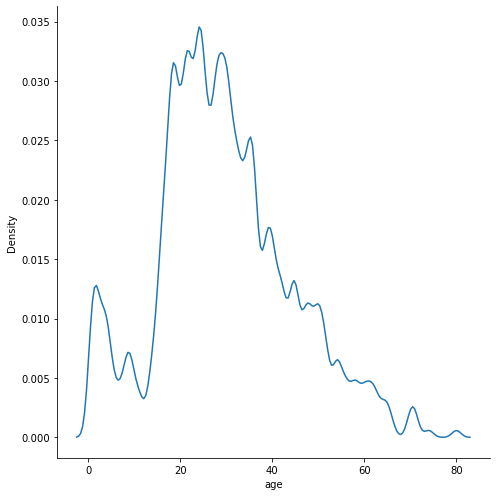

In [81]:
sns.displot(data, x="age", height=7, kind = 'kde', bw_adjust = .25)

Al igual que antes, podemos pintar distintas variables en el mismo gráfico

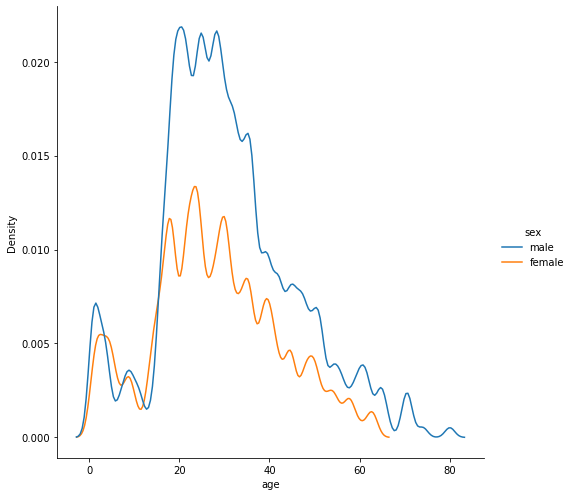

In [83]:
sns.displot(data, x="age", height=7, kind = 'kde', hue = 'sex', bw_adjust = .25)

### Empirical cumulative distributions

Una tercera opción para visualizar distribuciones calcula la "función de distribución acumulativa empírica"(ECDF). Este gráfico dibuja una curva que aumenta monótonamente a través de cada punto de datos, de modo que la altura de la curva refleja la proporción de observaciones con un valor menor:

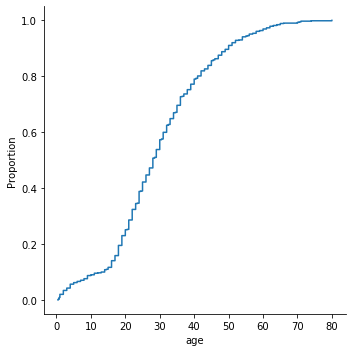

In [84]:
sns.displot(data, x="age", kind='ecdf')

De esta gráfica podemos sacar conclusiones del tipo:
- El 20% de las personas son menores de 20 años

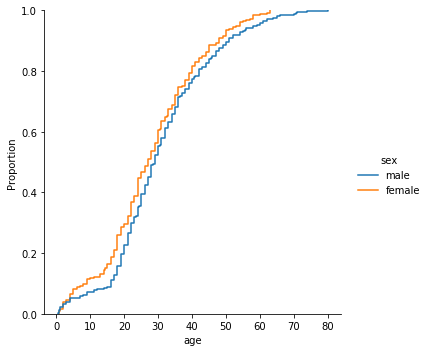

In [85]:
sns.displot(data, x="age", kind='ecdf', hue = 'sex')

In [88]:
data.query('sex == "female"')['age'].max()

63.0

### Pairplot

Por último, vamos a ver el gráfico de pairplot que nos permite ver distintas distribuciones

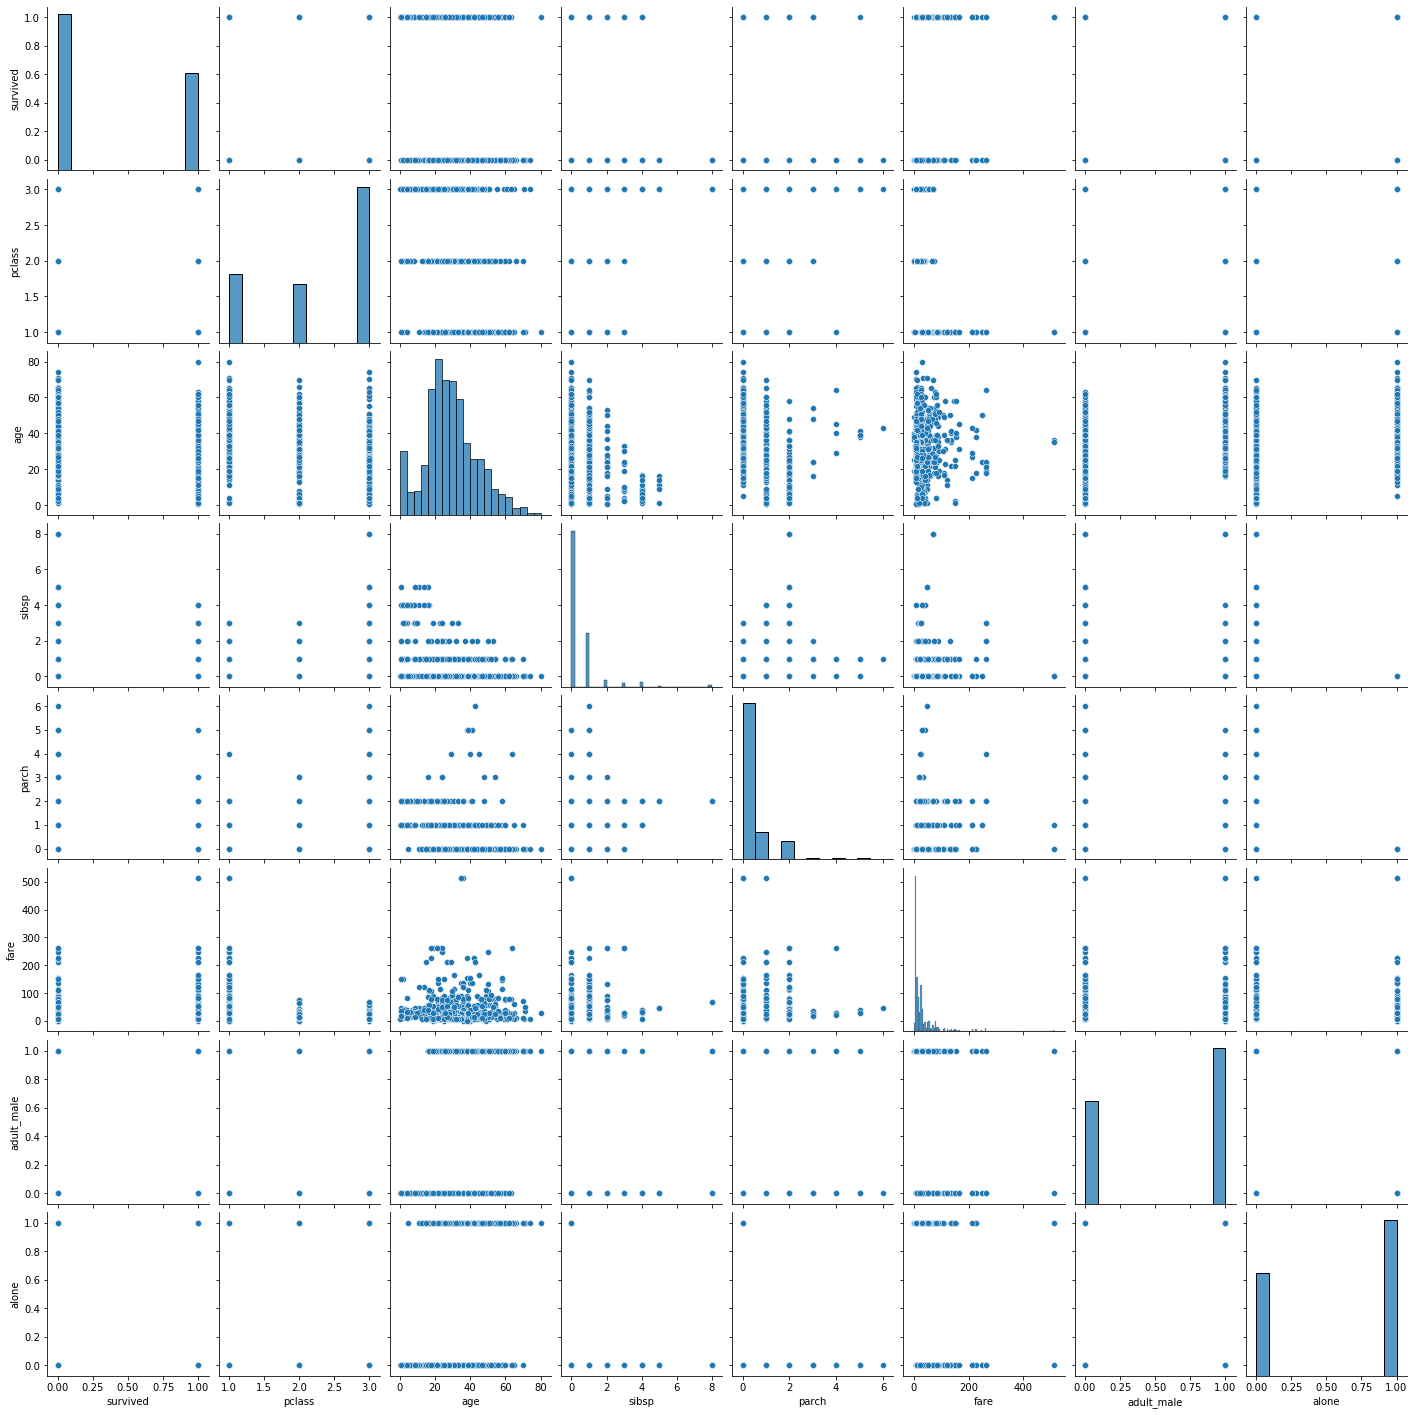

In [89]:
sns.pairplot(data)